In [1]:
%matplotlib inline
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')

In [2]:
pd.options.display.max_rows = 4000

In [3]:
# Read data
tour_chile_data =pd.read_excel('Tourism Chile.xlsx') 
region = list(tour_chile_data.iloc[3:18,2])
features_types = list(tour_chile_data.iloc[1,2:].unique())
features_types.pop(0)
tour_data = tour_chile_data.iloc[2:18, 1:]
tour_data.columns = tour_data.iloc[0,:]
tour_data = tour_data.iloc[1:, 1:]
variables = list(tour_data.columns)
variables.pop(0)
tour_data = tour_data.set_index("VARIABLE")
tour_data.head()

2,CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR,NUMBER OF CULTURAL CENTERS,WORLD CULTURAL HERITAGE SITES,NUMBER OF ARCHEOLOGICAL SITES,NATIONAL MONUMENTS,MUSEUMS,% OF POPULATION THAT ATTENDS MUSEUMS,THEATERS,NUMBER OF THEATER PLAYS PER YEAR,LIBRARIES,...,Governmental resources allocated to tourism promotion ($M),Public infrastructure investments related to the tourism sector ($),Entrepreneurial and Innovation funds allocated to tourism related projects ($),Seed funds allocated to the tourism sector ($),Governmental funds devoted to tourism development ($),Number of regional strategy plans for tourism development,NaN,NaN,NaN,NaN
VARIABLE,,,,,,,,,,,,,,,,,,,,,
Arica y Parinacota,31,2,0,30,28,4,22.1,2,105,12,...,92641,36370835,11757543,446922,24729573,1,NaN,NaN,NaN,NaN
Tarapacá,0,5,1,13,73,5,20.8,2,178,12,...,0,42364100,12796789,355208,29714382,2,NaN,NaN,NaN,NaN
Antofagasta,1,9,0,28,81,16,27.4,8,203,15,...,149744,38262875,29066423,192572,50841622,1,NaN,NaN,NaN,NaN
Atacama,8,10,0,8,35,7,20,0,144,12,...,0,35948639,16986593,233225,30224699,2,NaN,NaN,NaN,NaN
Coquimbo,23,7,0,2,52,7,18.3,4,80,22,...,0,64917630,33222779,673800,44790979,3,NaN,NaN,NaN,NaN


In [4]:
tour_data.columns

Index([                                 'CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR',
                                                           'NUMBER OF CULTURAL CENTERS',
                                                        'WORLD CULTURAL HERITAGE SITES',
                                                        'NUMBER OF ARCHEOLOGICAL SITES',
                                                                   'NATIONAL MONUMENTS',
                                                                              'MUSEUMS',
                                                 '% OF POPULATION THAT ATTENDS MUSEUMS',
                                                                             'THEATERS',
                                                     'NUMBER OF THEATER PLAYS PER YEAR',
                                                                            'LIBRARIES',
       ...
                           'Governmental resources allocated to tourism promotion ($M)',
          

In [35]:
tour_data.astype('float').describe()

2,CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR,NUMBER OF CULTURAL CENTERS,WORLD CULTURAL HERITAGE SITES,NUMBER OF ARCHEOLOGICAL SITES,NATIONAL MONUMENTS,MUSEUMS,% OF POPULATION THAT ATTENDS MUSEUMS,THEATERS,NUMBER OF THEATER PLAYS PER YEAR,LIBRARIES,...,Governmental resources allocated to tourism promotion ($M),Public infrastructure investments related to the tourism sector ($),Entrepreneurial and Innovation funds allocated to tourism related projects ($),Seed funds allocated to the tourism sector ($),Governmental funds devoted to tourism development ($),Number of regional strategy plans for tourism development,NaN,NaN,NaN,NaN
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,15.000000,15.0,15.0,15.0,15.0
mean,11.266667,16.066667,0.333333,8.200000,84.600000,9.933333,20.026667,9.866667,638.933333,34.066667,...,1.899619e+05,7.449550e+07,2.417698e+07,5.153190e+05,4.747599e+07,1.666667,0.0,0.0,0.0,0.0
std,12.209286,15.177364,0.617213,10.638206,94.862156,8.514414,4.873466,17.137539,1646.395130,31.524291,...,2.947618e+05,5.391246e+07,9.903396e+06,3.996256e+05,2.044581e+07,0.723747,0.0,0.0,0.0,0.0
min,0.000000,2.000000,0.000000,0.000000,17.000000,0.000000,11.100000,0.000000,4.000000,12.000000,...,0.000000e+00,3.095575e+07,1.175754e+07,0.000000e+00,2.472957e+07,1.000000,0.0,0.0,0.0,0.0
25%,1.000000,6.000000,0.000000,1.000000,40.000000,5.500000,17.250000,2.000000,99.500000,12.000000,...,0.000000e+00,3.731686e+07,1.741866e+07,2.942165e+05,3.025640e+07,1.000000,0.0,0.0,0.0,0.0
50%,5.000000,10.000000,0.000000,2.000000,59.000000,7.000000,20.000000,7.000000,179.000000,22.000000,...,6.350000e+04,5.020091e+07,2.206548e+07,4.469220e+05,4.479098e+07,2.000000,0.0,0.0,0.0,0.0
75%,20.500000,20.500000,0.500000,11.000000,77.000000,11.500000,22.300000,8.500000,297.000000,46.000000,...,2.688300e+05,9.945045e+07,3.005851e+07,7.058375e+05,5.308839e+07,2.000000,0.0,0.0,0.0,0.0
max,32.000000,56.000000,2.000000,30.000000,404.000000,35.000000,27.700000,70.000000,6558.000000,127.000000,...,1.079295e+06,2.305630e+08,4.355227e+07,1.646127e+06,9.087590e+07,3.000000,0.0,0.0,0.0,0.0


In [6]:
tour_data.dtypes

2
CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR                                      object
NUMBER OF CULTURAL CENTERS                                                         object
WORLD CULTURAL HERITAGE SITES                                                      object
NUMBER OF ARCHEOLOGICAL SITES                                                      object
NATIONAL MONUMENTS                                                                 object
MUSEUMS                                                                            object
% OF POPULATION THAT ATTENDS MUSEUMS                                               object
THEATERS                                                                           object
NUMBER OF THEATER PLAYS PER YEAR                                                   object
LIBRARIES                                                                          object
GALERIES                                                                           object
% OF POP

In [7]:
print(tour_data.isnull().sum(axis = 0))

2
CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR                                      0
NUMBER OF CULTURAL CENTERS                                                         0
WORLD CULTURAL HERITAGE SITES                                                      0
NUMBER OF ARCHEOLOGICAL SITES                                                      0
NATIONAL MONUMENTS                                                                 0
MUSEUMS                                                                            0
% OF POPULATION THAT ATTENDS MUSEUMS                                               0
THEATERS                                                                           0
NUMBER OF THEATER PLAYS PER YEAR                                                   0
LIBRARIES                                                                          0
GALERIES                                                                           0
% OF POPULATION ASSOCIATED TO AN INDIGENOUS GROUP              

### Feature engineering & Data Cleaning

- some columns contains string/sentences data instead of numeric values
- clean "-" ands ','
- convert strings into numeric data type

In [8]:
col_lst = list(tour_data.columns)
for col in col_lst:
    new_col = tour_data[col].replace('-', '0').fillna(0)
    tour_data[col] = new_col.astype('float')

In [9]:
tour_data = tour_data.astype('float')

### PCA Analysis:

https://medium.com/predict/dimensionality-reduction-using-python-principal-component-analysis-fb365f39ae5c

In [10]:
X = tour_data.iloc[:, :].values

##### Standardize the data

In [11]:
from sklearn.preprocessing import StandardScaler
# on this distribution. 
sc = StandardScaler()
X_std =  sc.fit_transform(X)

In [12]:
tour_data_scaled  = pd.DataFrame(X_std)
tour_data_scaled.columns = tour_data.columns

##### correlation matrix

In [13]:
corr_matrix = pd.DataFrame(X_std).corr(method='pearson')
corr_matrix.columns = variables
corr_matrix['index'] = variables

corr_matrix = corr_matrix.set_index('index')
corr_matrix

,CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR,NUMBER OF CULTURAL CENTERS,WORLD CULTURAL HERITAGE SITES,NUMBER OF ARCHEOLOGICAL SITES,NATIONAL MONUMENTS,MUSEUMS,% OF POPULATION THAT ATTENDS MUSEUMS,THEATERS,NUMBER OF THEATER PLAYS PER YEAR,LIBRARIES,...,Governmental resources allocated to tourism promotion ($M),Public infrastructure investments related to the tourism sector ($),Entrepreneurial and Innovation funds allocated to tourism related projects ($),Seed funds allocated to the tourism sector ($),Governmental funds devoted to tourism development ($),Number of regional strategy plans for tourism development,NaN,NaN,NaN,NaN
index,,,,,,,,,,,,,,,,,,,,,
CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR,1.000000,-0.118441,0.044234,0.207986,-0.129906,-0.270539,-0.261826,-0.078334,-0.133214,-0.010628,...,0.101045,-0.076621,-0.201447,-0.077651,-0.135004,-5.388945e-03,NaN,NaN,NaN,NaN
NUMBER OF CULTURAL CENTERS,-0.118441,1.000000,0.271959,-0.167313,0.844259,0.863417,0.116340,0.810156,0.771981,0.916630,...,0.287225,0.948625,0.672294,0.162966,0.863657,-6.285874e-02,NaN,NaN,NaN,NaN
WORLD CULTURAL HERITAGE SITES,0.044234,0.271959,1.000000,0.315476,0.125655,-0.049837,0.326909,-0.083285,-0.130016,0.075869,...,0.634967,0.053371,-0.011013,0.169272,0.007104,-2.132007e-01,NaN,NaN,NaN,NaN
NUMBER OF ARCHEOLOGICAL SITES,0.207986,-0.167313,0.315476,1.000000,-0.048895,-0.082644,0.563521,-0.199265,-0.197258,-0.236461,...,0.318517,-0.311119,-0.329238,-0.166846,-0.305021,-4.824143e-01,NaN,NaN,NaN,NaN
NATIONAL MONUMENTS,-0.129906,0.844259,0.125655,-0.048895,1.000000,0.842485,0.242720,0.943688,0.938400,0.897171,...,0.041467,0.839852,0.610222,-0.291789,0.664556,-2.965085e-01,NaN,NaN,NaN,NaN
MUSEUMS,-0.270539,0.863417,-0.049837,-0.082644,0.842485,1.000000,0.305593,0.872746,0.839970,0.829503,...,-0.045594,0.877940,0.708232,0.026823,0.852674,-1.197763e-01,NaN,NaN,NaN,NaN
% OF POPULATION THAT ATTENDS MUSEUMS,-0.261826,0.116340,0.326909,0.563521,0.242720,0.305593,1.000000,0.127048,0.106328,0.033323,...,0.156016,-0.030483,0.039372,-0.095089,0.001544,-5.299023e-01,NaN,NaN,NaN,NaN
THEATERS,-0.078334,0.810156,-0.083285,-0.199265,0.943688,0.872746,0.127048,1.000000,0.982734,0.893389,...,-0.117107,0.873229,0.621322,-0.233745,0.722248,-2.284349e-01,NaN,NaN,NaN,NaN
NUMBER OF THEATER PLAYS PER YEAR,-0.133214,0.771981,-0.130016,-0.197258,0.938400,0.839970,0.106328,0.982734,1.000000,0.844666,...,-0.147511,0.845291,0.554758,-0.272757,0.638774,-2.262515e-01,NaN,NaN,NaN,NaN


- Factor Score: Standerdized weighted Average
- loading: The elements of an eigenvector, that is, the values within a particular row of matrix A, are the weights aij. These values are called the loadings, and they describe how much each variable contributes to a particular principal component. Large loadings (positive or negative) indicate that a particular variable has a strong relationship to a particular principal component. The sign of a loading indicates whether a variable and a principal component are positively or negatively correlated.

In [14]:
# Explore the importance of each feature for principle components


import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=10).fit(tour_data_scaled)

# loadings:
# print(pca.components_.T)

# the variance explained by each components
print('\n')
print(list(np.round(pca.explained_variance_ratio_, 4)) )
 
# vars = pca.explained_variance_ratio_

# c_names = tour_data.columns

# sum = 0

# print('Variance:  Projected dimension')

# print('------------------------------')

# for idx, row in enumerate(pca.components_):

#     output = '{0:4.1f}%:    '.format(100.0 * vars[idx])

#     output += " + ".join("{0:5.2f} * {1:s}".format(val, name) \

#                       for val, name in zip(row, c_names))

#     sum += 100*vars[idx]

#     print(output)

 
# print('\n')
# print('Total variance explained by the 5 components {0:4.1f}%'.format(sum))



[0.334, 0.1305, 0.091, 0.0879, 0.0665, 0.0499, 0.0473, 0.0408, 0.0396, 0.0334]


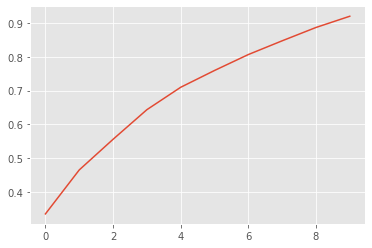

In [15]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [16]:
variance_weights =  list(np.round(pca.explained_variance_ratio_, 4))

### Calculate weights on each components by multiplying the variance

choose the top 10 compoennts that made up for 90% of variance

In [17]:
weights = pd.DataFrame( np.column_stack((
       tour_data.columns,
     pca.components_[0] * pca.explained_variance_ratio_[0]
     ,pca.components_[1] * pca.explained_variance_ratio_[1]
     ,pca.components_[2] * pca.explained_variance_ratio_[2]
     ,pca.components_[3] * pca.explained_variance_ratio_[3]
     ,pca.components_[4] * pca.explained_variance_ratio_[4]
    ,pca.components_[5] * pca.explained_variance_ratio_[5]
    ,pca.components_[6] * pca.explained_variance_ratio_[6]
    ,pca.components_[7] * pca.explained_variance_ratio_[7]
    ,pca.components_[8] * pca.explained_variance_ratio_[8]
    ,pca.components_[9] * pca.explained_variance_ratio_[9]) ) ).set_index(0)

# weights['sum_avg'] = weights.sum(axis = 1)
weights.head()

,1,2,3,4,5,6,7,8,9,10
0,,,,,,,,,,
CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR,-0.003369,-0.019457,0.000572,0.005972,-0.011663,0.002691,-0.002941,0.00366,-0.004177,-0.003877
NUMBER OF CULTURAL CENTERS,0.046317,-0.003196,0.005578,0.000023,0.002432,-0.002663,0.00029,-0.003047,-0.00008,0.000306
WORLD CULTURAL HERITAGE SITES,0.004909,-0.005293,0.013901,0.01358,0.004289,0.004518,-0.002098,-0.005089,0.006767,-0.002256
NUMBER OF ARCHEOLOGICAL SITES,-0.004757,0.005397,-0.001284,0.016583,-0.003984,0.007847,0.00355,-0.006299,-0.001587,0.000033
NATIONAL MONUMENTS,0.04859,0.005203,0.001809,0.000024,-0.002108,0.00118,0.001265,0.001065,0.00213,-0.000976


### Apply PCA model (with selected components) to Data 

In [19]:

# calculate the components (projection of the first 8 components)
components_model = pca.fit_transform(X_std)
PCAcomponents = pd.DataFrame(data = components_model, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8' , 'PC9' , 'PC10'])
PCAcomponents

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-3.501633,1.453817,-1.613957,0.941016,-4.337756,5.172251,-2.724599,-1.297825,-3.744994,0.935731
1,-2.331451,1.676414,-4.732692,2.488315,2.087676,3.957487,-1.012800,-0.062318,5.374310,1.570139
2,-0.844717,3.889149,-3.270544,2.794318,2.602990,-1.269748,4.628749,-2.333358,-0.814003,-1.283824
3,-3.615421,0.827625,-4.832987,2.062800,0.618795,-0.668569,1.906110,1.401660,-0.247537,-1.815648
4,-1.001688,-3.052196,0.231786,3.483379,2.690443,-0.918127,-1.834097,6.728620,-1.957796,1.480365
5,4.736201,-1.584783,8.324846,7.499200,-0.572084,0.933913,1.622983,-1.871869,0.765725,1.357967
6,22.244661,4.433836,-1.454866,-2.197871,-1.623276,-0.128492,-1.054856,1.160113,0.475408,-0.572360
7,-1.260320,-4.540317,0.237458,2.217112,-3.616515,-2.671914,-2.294278,-0.858177,1.868770,-3.920736
8,-1.142235,-5.514266,-1.386164,-0.980807,-2.038584,-1.231810,0.103088,0.036668,-0.329913,-2.166695
9,3.048909,-3.496506,-2.381737,-1.223051,2.148572,-4.021886,0.277348,-2.658711,-2.011137,4.171122


### Apply calculated weights to transformed data 

each obervations correspond to a region: weight %*% PACcomponents 

X(15,10) %*% weight.T(10, 131) 

In [20]:
# weights.values.shape # (15,81)
# PCAcomponents.shape  # (15, 5)

tour_data_weighted = pd.DataFrame(np.dot(PCAcomponents, weights.values.T))
tour_data_weighted.columns = tour_data.columns
tour_data_weighted['region'] = region
tour_data_weighted.set_index('region')

2,CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR,NUMBER OF CULTURAL CENTERS,WORLD CULTURAL HERITAGE SITES,NUMBER OF ARCHEOLOGICAL SITES,NATIONAL MONUMENTS,MUSEUMS,% OF POPULATION THAT ATTENDS MUSEUMS,THEATERS,NUMBER OF THEATER PLAYS PER YEAR,LIBRARIES,...,Governmental resources allocated to tourism promotion ($M),Public infrastructure investments related to the tourism sector ($),Entrepreneurial and Innovation funds allocated to tourism related projects ($),Seed funds allocated to the tourism sector ($),Governmental funds devoted to tourism development ($),Number of regional strategy plans for tourism development,NaN,NaN,NaN,NaN
region,,,,,,,,,,,,,,,,,,,,,
Arica y Parinacota,0.067994,-0.196382,-0.044911,0.104526,-0.163949,-0.173601,0.016187,-0.159573,-0.143641,-0.185899,...,-0.044862,-0.188122,-0.192503,-0.030785,-0.206443,-0.062067,0.0,0.0,0.0,0.0
Tarapacá,-0.052095,-0.145201,0.009791,0.078541,-0.10423,-0.106414,0.01914,-0.115753,-0.097223,-0.153267,...,-0.063744,-0.141902,-0.132832,-0.035297,-0.14383,0.025697,0.0,0.0,0.0,0.0
Antofagasta,-0.105558,-0.051897,-0.027267,0.087592,-0.030748,0.018034,0.127422,-0.040506,-0.032916,-0.074825,...,-0.029674,-0.068218,-0.037733,-0.02982,-0.038983,-0.034014,0.0,0.0,0.0,0.0
Atacama,0.004216,-0.197981,-0.070375,0.052639,-0.177001,-0.142978,0.007489,-0.166332,-0.156956,-0.199157,...,-0.078245,-0.193072,-0.14618,-0.029751,-0.161442,0.038449,0.0,0.0,0.0,0.0
Coquimbo,0.082308,-0.046705,0.022173,-0.017901,-0.071575,-0.062343,-0.038044,-0.077911,-0.0804,-0.057145,...,0.00417,-0.039584,0.006887,0.060029,-0.028921,0.124726,0.0,0.0,0.0,0.0
Valparaíso,0.053519,0.273695,0.259204,0.108576,0.2398,0.180601,0.14492,0.162678,0.144458,0.231476,...,0.257899,0.208678,0.149335,0.046188,0.171778,-0.099927,0.0,0.0,0.0,0.0
Metropolitana,-0.149009,1.000301,0.028929,-0.122834,1.105986,1.042381,0.225342,1.102805,1.091828,1.043317,...,-0.032956,1.033969,0.745366,-0.184622,0.861671,-0.222135,0.0,0.0,0.0,0.0
O'Higgins,0.151957,-0.043566,0.054342,0.005562,-0.075916,-0.091411,-0.074106,-0.064171,-0.078285,-0.048562,...,0.069463,-0.056494,-0.088434,0.024548,-0.056017,0.000308,0.0,0.0,0.0,0.0
Maule,0.134564,-0.045432,-0.021068,-0.039771,-0.082297,-0.074297,-0.130791,-0.059201,-0.074225,-0.031443,...,-0.010759,-0.03734,-0.037462,0.014506,-0.015567,0.05786,0.0,0.0,0.0,0.0


### Aggregate all the feature into groups and rank each region with the aggreagted scores 

rankings are based on aggreagted feature's core for each region

In [21]:
features = pd.read_csv("feature_aggregation.csv")
entire_types = list(features['Type'].unique())
types = list(features['Type_Agg'].unique())
colors_types = list(features['Color'].unique())
feature_color_schema = dict(zip(types, colors_types))

In [22]:
feature_dict = {}
# sort and organzie all the variables into each type of features in dictuionary 
for ind, val in enumerate(features['Variables']):
    if features['Type_Agg'][ind] in types:
        feature_dict[features['Type_Agg'][ind]] = [val]
        types.remove(features['Type_Agg'][ind])
    
    if features['Type_Agg'][ind] not in types:
        feature_dict[features['Type_Agg'][ind]].append(val)
        

In [23]:
## caculate the weighted average all the feature's weights based on the types of features 
# scale the score by 100 so it can be more significant
ranked_regions = pd.DataFrame(np.column_stack(( 
    region,
     np.round(tour_data_weighted[feature_dict['CHE']].sum(axis =1)*100, 4)  ,
    np.round(tour_data_weighted[feature_dict['NRS']].sum(axis =1)*100, 4),
    np.round(tour_data_weighted[feature_dict['HRTWD']].sum(axis =1)*100, 4),
    np.round(tour_data_weighted[feature_dict['TI']].sum(axis =1)*100, 4),
    np.round(tour_data_weighted[feature_dict['TPI']].sum(axis =1)*100, 4),
    
    np.round(tour_data_weighted[feature_dict['TRS']].sum(axis =1)*100, 4)  ,
    np.round(tour_data_weighted[feature_dict['SS']].sum(axis =1)*100, 4),
    np.round(tour_data_weighted[feature_dict['EP']].sum(axis =1)*100, 4),
    np.round(tour_data_weighted[feature_dict['TP']].sum(axis =1)*100, 4),
    np.round(tour_data_weighted[feature_dict['GIE']].sum(axis =1)*100, 4)
    
    )))
ranked_regions.columns = ['Regions', 'CHE_Rank', 'NRS_Rank', 'HRTWD_Rank', 'TI_Rank', 'TPI_Rank',
                          'TRS_Rank', 'SS_Rank', 'EP_Rank', 'TP_Rank', 'GIE_Rank']
ranked_regions = ranked_regions.set_index("Regions")
ranked_regions = ranked_regions.astype("float")

getting the distribuion of scoreing on each types of features 

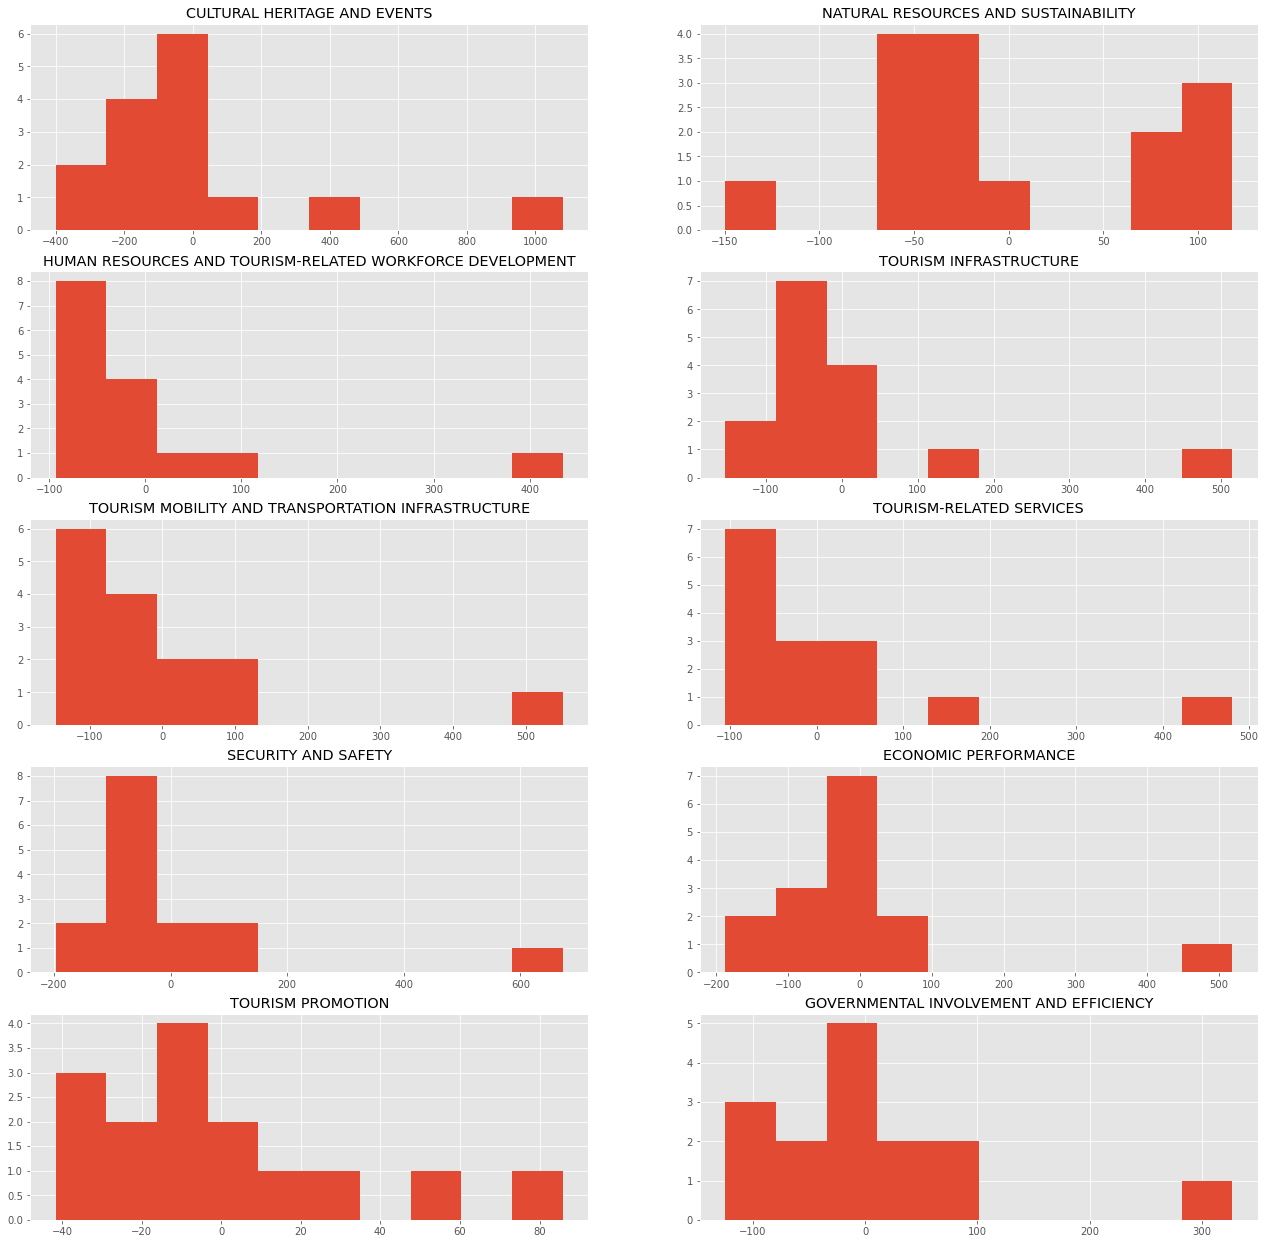

In [25]:
# viz each's rank's ditribution to create filter for ranking of the region
for_plot =ranked_regions[ranked_regions.columns.difference(['Regions'])].astype(float)
fig = plt.figure(figsize=(22,22))

plt.subplot(5, 2, 1)
plt.hist(for_plot['CHE_Rank'])
plt.title("CULTURAL HERITAGE AND EVENTS")

plt.subplot(5, 2, 2)
plt.hist(for_plot['NRS_Rank'])
plt.title("NATURAL RESOURCES AND SUSTAINABILITY")

plt.subplot(5, 2, 3)
plt.hist(for_plot['HRTWD_Rank'])
plt.title("HUMAN RESOURCES AND TOURISM-RELATED WORKFORCE DEVELOPMENT")

plt.subplot(5, 2, 4)
plt.hist(for_plot['TI_Rank'])
plt.title("TOURISM INFRASTRUCTURE")

plt.subplot(5, 2, 5)
plt.hist(for_plot['TPI_Rank'])
plt.title("TOURISM MOBILITY AND TRANSPORTATION INFRASTRUCTURE")

plt.subplot(5, 2, 6)
plt.hist(for_plot['TRS_Rank'])
plt.title("TOURISM-RELATED SERVICES")

plt.subplot(5, 2, 7)
plt.hist(for_plot['SS_Rank'])
plt.title("SECURITY AND SAFETY")

plt.subplot(5, 2, 8)
plt.hist(for_plot['EP_Rank'])
plt.title("ECONOMIC PERFORMANCE")

plt.subplot(5, 2, 9)
plt.hist(for_plot['TP_Rank'])
plt.title("TOURISM PROMOTION")

plt.subplot(5, 2, 10)
plt.hist(for_plot['GIE_Rank'])
plt.title("GOVERNMENTAL INVOLVEMENT AND EFFICIENCY")

plt.show()


### Swot & Market Analysis on Each Region

Plot compare the features types scores across regions, display the weak spots and strong spots for all the regions


- CHE	red  CULTURAL HERITAGE AND EVENTS
- NRS	green  NATURAL RESOURCES AND SUSTAINABILITY
- HRTWD	brown  HUMAN RESOURCES AND TOURISM-RELATED WORKFORCE DEVELOPMENT
- TI	gray  TOURISM INFRASTRUCTURE
- TPI	black TOURISM MOBILITY AND TRANSPORTATION INFRASTRUCTURE

- TRS	darkred	TOURISM-RELATED SERVICES
- SS	violet	SECURITY AND SAFETY
- EP	yellow	ECONOMIC PERFORMANCE
- TP	pink	TOURISM PROMOTION
- GIE	steelblue	GOVERNMENTAL INVOLVEMENT AND EFFICIENCY


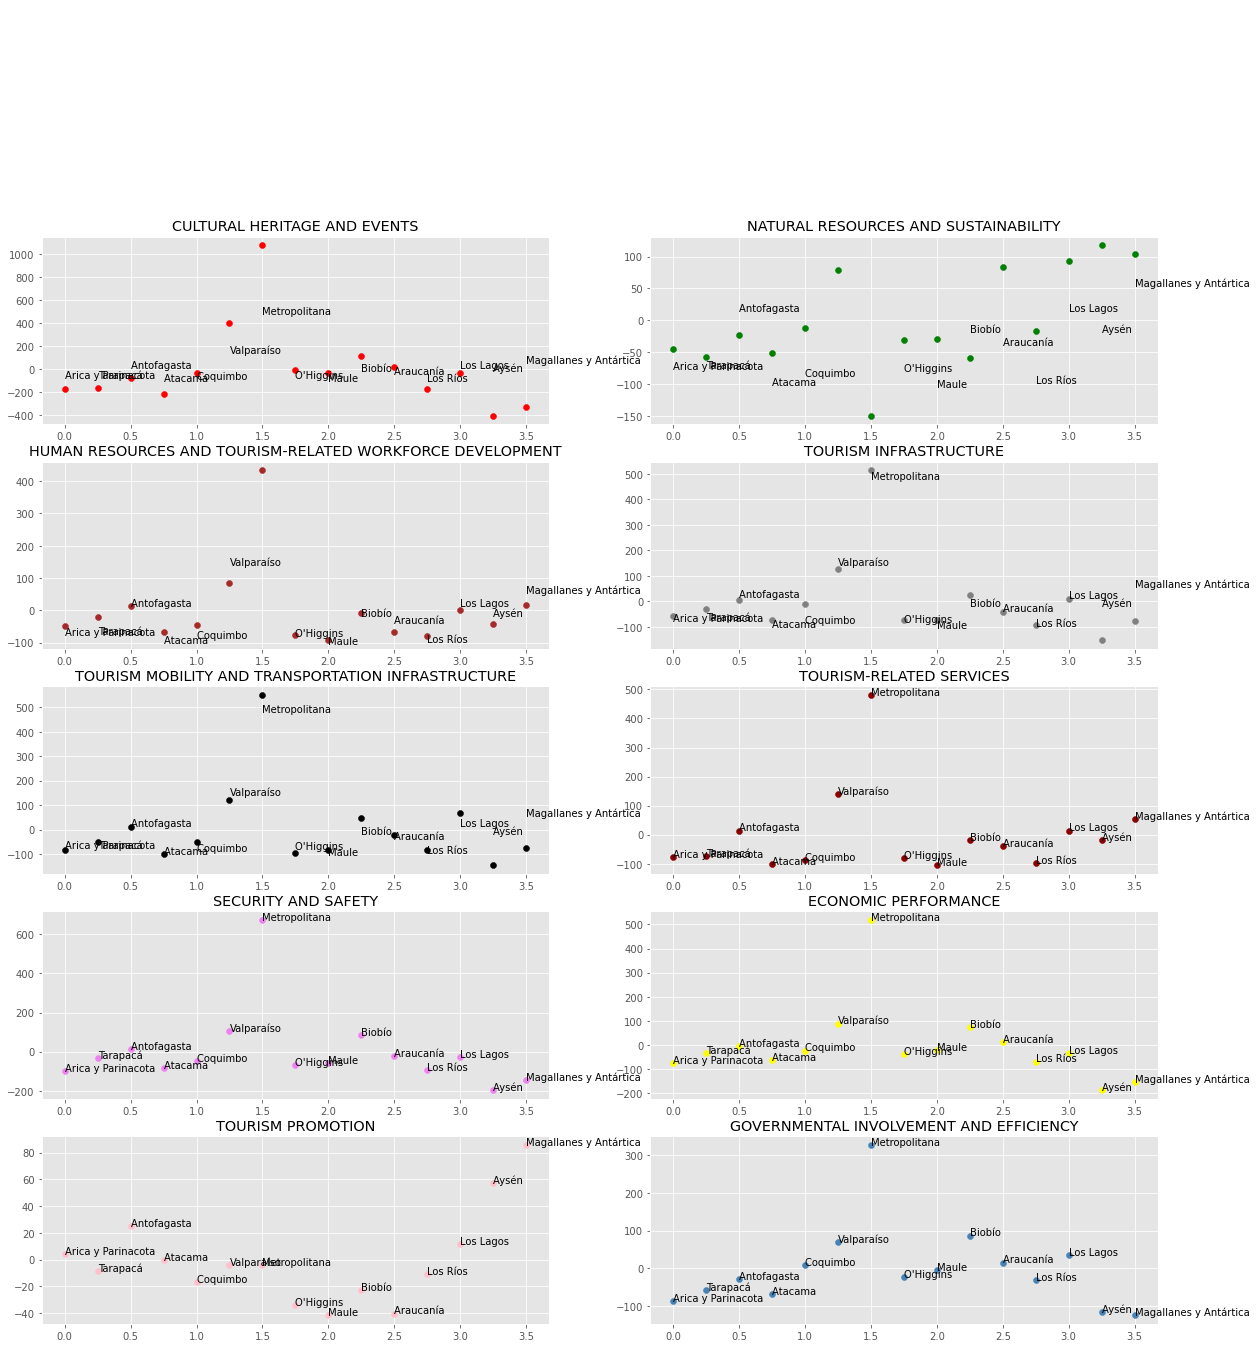

In [39]:
fig = plt.figure(figsize=(20,20))
x = []
val = 0
y_CHE = list(ranked_regions[['CHE_Rank']]['CHE_Rank'])
y_NRS = list(ranked_regions[['NRS_Rank']]['NRS_Rank'])
y_HRTWD = list(ranked_regions[['HRTWD_Rank']]['HRTWD_Rank'])
y_TI = list(ranked_regions[['TI_Rank']]['TI_Rank'])
y_TPI = list(ranked_regions[['TPI_Rank']]['TPI_Rank'])
y_TRS = list(ranked_regions[['TRS_Rank']]['TRS_Rank'])
y_SS = list(ranked_regions[['SS_Rank']]['SS_Rank'])
y_EP = list(ranked_regions[['EP_Rank']]['EP_Rank'])
y_TP = list(ranked_regions[['TP_Rank']]['TP_Rank'])
y_GIE = list(ranked_regions[['GIE_Rank']]['GIE_Rank'])

n = list(ranked_regions.index)
# genete x-axis
for i in range(15):
    x.append(val)
    val += 0.25

plt.subplot(5, 2, 1)
plt.scatter(x, y_CHE , color = 'red')
plt.title('CULTURAL HERITAGE AND EVENTS')
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y_TRS[i]))

plt.subplot(5, 2, 2)
plt.scatter(x, y_NRS, color = 'green')
plt.title('NATURAL RESOURCES AND SUSTAINABILITY')
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y_TRS[i]))
    
plt.subplot(5, 2, 3)
plt.scatter(x, y_HRTWD, color = 'brown')
plt.title('HUMAN RESOURCES AND TOURISM-RELATED WORKFORCE DEVELOPMENT')
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y_TRS[i]))
    
plt.subplot(5, 2, 4)
plt.scatter(x, y_TI, color = 'grey')
plt.title('TOURISM INFRASTRUCTURE')
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y_TRS[i]))

plt.subplot(5, 2, 5)
plt.scatter(x, y_TPI, color = 'black')
plt.title('TOURISM MOBILITY AND TRANSPORTATION INFRASTRUCTURE')
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y_TRS[i]))
    
plt.subplot(5, 2, 6)
plt.scatter(x, y_TRS, color = 'darkred')
plt.title('TOURISM-RELATED SERVICES')
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y_TRS[i]))

plt.subplot(5, 2, 7)
plt.scatter(x, y_SS, color = 'violet')
plt.title('SECURITY AND SAFETY')
n = list(ranked_regions.index)
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y_SS[i]))
    
plt.subplot(5, 2, 8)
plt.scatter(x, y_EP , color = 'yellow')
plt.title('ECONOMIC PERFORMANCE')
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y_EP[i]))
    
plt.subplot(5, 2, 9)
plt.scatter(x, y_TP, color = 'pink')
plt.title('TOURISM PROMOTION')
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y_TP[i]))
    
plt.subplot(5, 2, 10)
plt.scatter(x, y_GIE, color = 'steelblue')
plt.title('GOVERNMENTAL INVOLVEMENT AND EFFICIENCY')
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y_GIE[i]))

### Calculated the Overall Competitive ranking report for each region

In [28]:
# the sum of absoluate values of feature types's rank 

ranked_regions_total_weights = ranked_regions
ranked_regions_total_weights["Region_Sum_Weights"] = ranked_regions_total_weights.sum(axis = 1)
ranked_regions_total_weights["Region_Avg_Weights"] = ranked_regions_total_weights.mean(axis = 1)
ranked_regions_total_weights_sortdesc = ranked_regions_total_weights.sort_values(by=['Region_Sum_Weights', "Region_Avg_Weights"] , ascending=False)
ranked_regions_total_weights_sortasec = ranked_regions_total_weights.sort_values(by=['Region_Sum_Weights', "Region_Avg_Weights"] )

In [40]:
ranked_regions_total_weights_sortdesc

,CHE_Rank,NRS_Rank,HRTWD_Rank,TI_Rank,TPI_Rank,TRS_Rank,SS_Rank,EP_Rank,TP_Rank,GIE_Rank,Region_Sum_Weights,Region_Avg_Weights
Regions,,,,,,,,,,,,
Metropolitana,1080.5033,-149.7191,434.4803,514.7463,550.8912,480.6686,672.7613,518.6456,-3.8551,326.8219,4425.9443,804.717145
Valparaíso,399.3531,78.2802,84.7279,126.8323,121.4345,139.8558,105.1651,89.1056,-4.0103,68.4730,1209.2172,219.857673
Biobío,117.9361,-59.3150,-7.0825,24.7168,45.8014,-18.8879,84.4861,75.8176,-23.0195,86.5037,326.9568,59.446691
Los Lagos,-29.4348,93.1086,1.1723,9.6736,66.9539,13.7510,-26.2059,-33.3028,11.8709,34.4102,141.9970,25.817636
Antofagasta,-74.1934,-23.8187,12.1607,3.7802,11.8207,14.2497,12.2448,-5.4618,25.1415,-27.6986,-51.7749,-9.413618
Araucanía,18.6382,84.4098,-66.2061,-41.6636,-23.6140,-38.7686,-20.4834,12.8057,-40.3056,15.0624,-100.1252,-18.204582
Coquimbo,-34.2778,-12.6587,-45.0999,-9.7904,-49.6300,-87.4326,-49.5221,-23.1227,-17.0574,8.3554,-320.2362,-58.224764
O'Higgins,-5.7210,-31.0619,-75.1080,-72.4517,-97.7224,-80.2709,-69.9653,-36.9238,-34.1017,-23.2583,-526.5850,-95.742727
Tarapacá,-160.6130,-58.5099,-21.7048,-28.6800,-53.1031,-74.7567,-33.7800,-32.1795,-8.5823,-57.0067,-528.9160,-96.166545


## Final Reporting & Recommandations

In [30]:
# colors are order by ranks
colors = ['azure', 'lightcyan', 'lightsteelblue', 'powderblue', 'lightblue', 
          'lightskyblue', 'deepskyblue', 'dodgerblue', 'cornflowerblue', 'royalblue', 
          'blue', 'mediumblue', 'darkblue', 'navy', 'midnightblue']

In [31]:
# read Regions' GIS data for map plotting 
# this csv files are geneated by some external research and data file arrangement outside of this analysis
region_gis_viz = pd.read_csv("chile_region_GIS.csv") 
region_gis_viz.head()

,Region,Longitude,Latitude,rank_with_weights,colors,Area(square_miles)
0,Metropolitana,-70.645348,-33.459229,15,midnightblue,5947.0
1,Valparaíso,-71.626953,-33.035580,14,navy,115.0
2,Biobío,-73.164400,-36.819400,13,darkblue,9224.0
3,Los Lagos,-72.942890,-41.465740,12,mediumblue,18758.0
4,Antofagasta,-70.395400,-23.652360,11,blue,11861.0


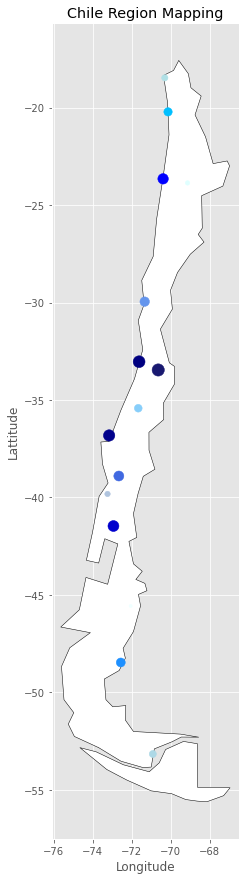

In [32]:
## Chile Map Viz
# importing all necessary libraries 
import geopandas as gpd
import geoplot
gdf = gpd.GeoDataFrame(
    region_gis_viz, geometry=gpd.points_from_xy(region_gis_viz['Longitude'], region_gis_viz['Latitude']))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# geoplot.polyplot(ax, figsize=(10,10))
# We restrict to South America.
ax = world[world.name == "Chile"].plot(color='white', edgecolor='black' , figsize=(40, 15)
                                      )
# world[world.continent == 'South America'].plot(color='white', edgecolor='black')

gdf.plot(ax=ax, color=gdf['colors'], markersize =gdf['rank_with_weights']*10)

plt.ylabel('Lattitude')
plt.xlabel('Longitude')
plt.title("Chile Region Mapping")
plt.show()

Text(0.5, 1.0, 'Ranked Regions')

<Figure size 1440x1800 with 0 Axes>

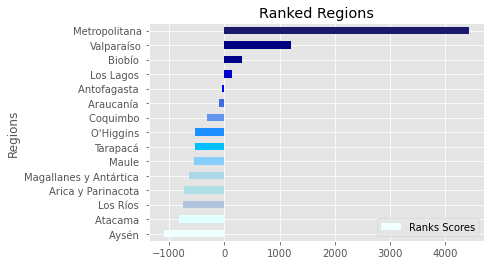

In [33]:
## Chile Region Ranking Bar charts (Vertical)
fig = plt.figure(figsize=(20,25))
df = pd.DataFrame({'Regions': list(ranked_regions_total_weights_sortasec.index), 
                   'Ranks Scores': list(np.round(ranked_regions_total_weights_sortasec["Region_Sum_Weights"], 3))})
ax = df.plot.barh(x='Regions', y='Ranks Scores', color = colors)
plt.title("Ranked Regions")

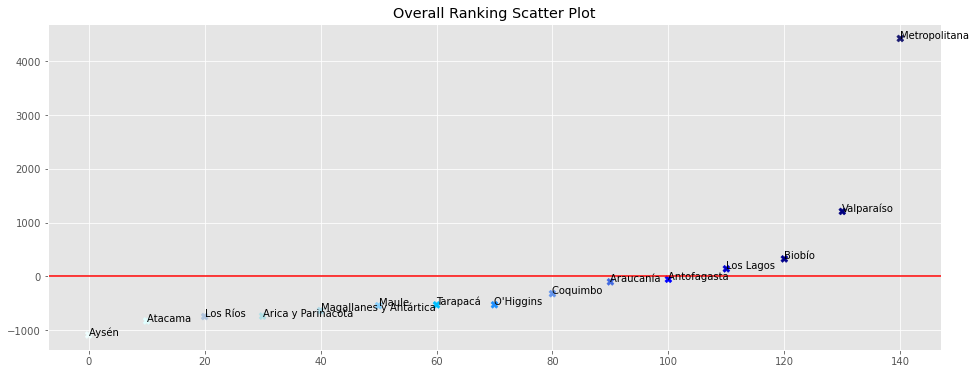

In [34]:
## Chile Regions Scatter Plotting
fig = plt.figure(figsize=(16,6))
y = list(np.round(ranked_regions_total_weights_sortasec["Region_Sum_Weights"], 3))
x = []
val = 0
for i in range(15):
    x.append(val)
    val += 10

plt.scatter(x, y, color = colors, marker= 'X', s= 50)
plt.title('Overall Ranking Scatter Plot')
plt.axhline(y=0, color='r', linestyle='-')
n = list(ranked_regions_total_weights_sortasec.index)
for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]))

## Recommandation


### Recommanded General Strategies:

1. There are obviously problem with uneven distribution of resources between the cities. so we should firstly identifying the strength of the each area, and chile tour bearu should foucs on improving the resources on each area's strength then use the econmic benefit from the strengthened area to carry their other weakness.


2. Since metroplolitan was obviously a strongest area in terms of all the resources, metroplotan should be the hub for education, infrastrcuture construction, Mobility and digitalization for toursim as a wholl while from there chile can  build connections from Metropolitan with other less developed regions as a ripple effect

3. While People, talents and workforces are the most important factor for all the projects, central government and local government should create edication policies to aid and promote for more poeple who can potentially majors in toursim, technologies, infrastructures, cultural activities, food, and natural science to prepare for the supply of market work forces

4. While constructing transportation infrastcruture such as buses, train, subways, shorelines and airport, local government should work togather to make partnership plans with each others to develop better secuity, regulations in economy, business, hotel, local entertainment projects and strategize toursim intersection and branches. 

5. Digitalization in payment and digital marketing and adverstising for Chile Tourism should also be in the mdeium priority, which it requires people who know global business and technologies and Chile also need policies and content in its ads promotion, this need to be in the preperation model in the beginning of the plans

### Emphasized Feature Dimensions with Regional Leaders

Prioritized Dimensions for Improvement and their Regional Leaders: 

4 – Tourism Infrastructure (Metropolitan, Valparalso)

5 - Tourism Mobility (Metropolitan, Valparalso)

10 - Government involvement  (Metropolitan, Malparalso, Bioblio)

3 – Human resources and Workforce Development (Metropolitan, Valparalso)

7 – Safety and Security (Metropolitan, Malparalso)

9 – Tourism Promotion (Magallanes Y Antartica, Aysens, Antofagasta)

6 - Tourism Related Services (Metropolitan, Valparalso)

8 - Economic Performances (Metropolitan, Malparalso, Bioblio)

1 - Cultural Heritage and Events (Metropolitan, Valparalso)

2 – Natural Resources (Magallanes Y Antartica, Los Lagos, Aysens, Antofagasta)





### 3 - 5 years plan: 

##### 3-8 months: 

- Scoping out budget, success metrics, stakeholders, and government involvement for this project 
- Making policies, resources & strategy planning, polictical campaigns and bills passing
- Begin addressing national level gaps in safety and security across the nation

##### 6 -12 months : 
- Push policies, investment bidding, education in corresponded projects and policies
- Begin making deatiled policies to improve safety and security in the reginional areas (gentrification)

##### 2nd year:  

- Start tourism infrastructure and mobility contsruction, digitalization on payment system and applications, prep for marketing and promotion
- start push education policy to promote Chile with local students and partnership programs to help form scholarship and financial aid for toursim related discipline, classes, starting projects and business
- Promote global partnership across regions in terms of travel and tourism.  
- Monitor and track infrastructure progress 
- Monitor and track safety and security improvement

##### 3rd year: 

- Monitor and track infrastructure progress 
- Monitering safety and security progress
- Promoting Economic policy on tourism, business, culture event, tour event
- preservation of natural resources sites
- Start many toursm programs, routes with new infrastructures
- Begin Global and South American toursim marketing campiagns to start attract tours, buinsess and investment into Chile


#### 4th year - 5 Years:

- Start to concentrate on Natural resources/toursim presevations and promotion
- Monitor and track infrastructure/digitalization progress 
- Monitering safety and security progress
- Monitor and track promotion & marketing
- Monitering new education and telent polcies effectiveness
- Measure Tourism effectiveness on Economic Impact & Imrpovement



